In [1]:
###Data Wrangling###

#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import gmaps

#paths to load csv files
VIO_Data_1= pd.read_csv("Resources/VIO_Data_1_Final.csv")
VIO_Data_2= pd.read_csv("Resources/VIO_Data_2_Final.csv")
VIO_US_Data = pd.read_csv("Resources/VIO_US_Data.csv")
ACES_Data = pd.read_csv("Resources/ACES_Data.csv")
Parts_Data = pd.read_csv("Resources/Parts_Data.csv")
Population_Data = pd.read_csv("Resources/State_Population.csv")

#merge the data into a single data set
VIO_Data_Complete = pd.merge(VIO_Data_1, VIO_Data_2, how="outer")
print(f'The length of VIO Data 1 is: {len(VIO_Data_1)} rows.')
print(f'The length of VIO Data 2 is: {len(VIO_Data_2)} rows.')
print(f'The length of merged VIO Data is: {len(VIO_Data_Complete)} rows.')

The length of VIO Data 1 is: 114382 rows.
The length of VIO Data 2 is: 155815 rows.
The length of merged VIO Data is: 270197 rows.


In [2]:
#print out the first 5 rows of the data set
VIO_Data_Complete.head()

,VehicleID,State,Year,Make,VIO
0,545,Wisconsin,1993,Land Rover,2.0
1,545,Montana,1993,Land Rover,9.0
2,545,New Hampshire,1993,Land Rover,6.0
3,545,Wyoming,1993,Land Rover,2.0
4,545,Florida,1993,Land Rover,14.0


In [3]:
#display counts of rows by column to determine if we need to drop any missing values
VIO_Data_Complete.count()

VehicleID    270197
State        268231
Year         270197
Make         270197
VIO          268231
dtype: int64

In [4]:
#we found that there were blank rows in the State and VIO columns, so we are dropping all blanks
VIO_Data_Clean = VIO_Data_Complete.dropna(how="any")

#verify that the counts are now correct
VIO_Data_Clean.count()

VehicleID    268231
State        268231
Year         268231
Make         268231
VIO          268231
dtype: int64

In [5]:
#check data types of the VIO data set
VIO_Data_Clean.dtypes

VehicleID      int64
State         object
Year           int64
Make          object
VIO          float64
dtype: object

In [6]:
#add age of cars column
VIO_Data_Clean['Age'] = 2019 - VIO_Data_Clean['Year']
VIO_Data_Clean.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26


In [7]:
#group the VIO data by car make and display it
Makes = VIO_Data_Clean.groupby('Make')
Makes.head()

,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26
398,238632,Wisconsin,2017,Jaguar,54.0,2
399,238632,Montana,2017,Jaguar,4.0,2
400,238632,New Hampshire,2017,Jaguar,16.0,2
401,238632,Wyoming,2017,Jaguar,6.0,2
402,238632,Florida,2017,Jaguar,807.0,2


In [8]:
#find the sum of VIO by make
Make_VIO = Makes['VIO'].sum()
Make_VIO

Make
Audi             2047227.0
BMW              4460541.0
Jaguar            456487.0
Land Rover        726037.0
Mercedes-Benz    4589723.0
Mini              707000.0
Porsche           680758.0
Saab              235215.0
Volkswagen       4723686.0
Volvo            1524833.0
Name: VIO, dtype: float64

In [9]:
###Data Frame

#put all the variables into a dataframe named school_summary_df
Makes_VIO_Summary = pd.DataFrame({"Total VIO": Make_VIO})

#remove the display of the index name
#print the dataframe, showing all rows
Makes_VIO_Summary = Makes_VIO_Summary.sort_values('Total VIO', ascending = False)
Makes_VIO_Summary

,Total VIO
Make,
Volkswagen,4723686.0
Mercedes-Benz,4589723.0
BMW,4460541.0
Audi,2047227.0
Volvo,1524833.0
Land Rover,726037.0
Mini,707000.0
Porsche,680758.0
Jaguar,456487.0


In [10]:
#find the average age of vehicles by make
Average_Age = Makes['Age'].mean()
Average_Age

Make
Audi              9.916117
BMW              11.315923
Jaguar           14.845397
Land Rover        9.356594
Mercedes-Benz    15.631978
Mini              5.622101
Porsche          14.796116
Saab             21.877011
Volkswagen       17.122899
Volvo            15.943907
Name: Age, dtype: float64

In [11]:
###Data Frame

#put all the variables into a dataframe named school_summary_df
Average_Age_Summary = pd.DataFrame({"Average Age": Average_Age})

#remove the display of the index name
#print the dataframe, showing all rows
Average_Age_Summary = Average_Age_Summary.sort_values('Average Age', ascending = False)
Average_Age_Summary

,Average Age
Make,
Saab,21.877011
Volkswagen,17.122899
Volvo,15.943907
Mercedes-Benz,15.631978
Jaguar,14.845397
Porsche,14.796116
BMW,11.315923
Audi,9.916117
Land Rover,9.356594


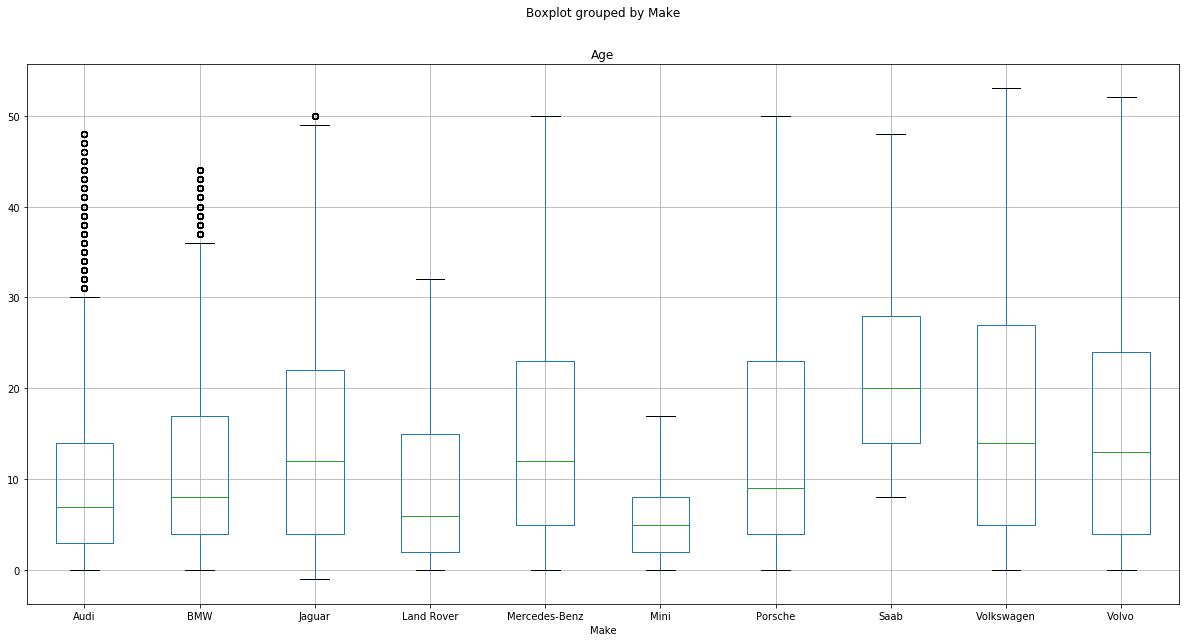

In [12]:
# Create a boxplot to compare means
VIO_Data_Clean.boxplot("Age", by="Make", figsize=(20, 10))
#save the pie chart
plt.savefig("Images/BoxPlot_Age_by_Make.png")

In [13]:
# Extract individual groups
group1 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Audi"]["Age"]
group2 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "BMW"]["Age"]
group3 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Jaguar"]["Age"]
group4 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Land Rover"]["Age"]
group5 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Mercedes-Benz"]["Age"]
group6 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Mini"]["Age"]
group7 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Porsche"]["Age"]
group8 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Saab"]["Age"]
group9 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Volkswagen"]["Age"]
group10 = VIO_Data_Clean[VIO_Data_Clean["Make"] == "Volvo"]["Age"]

In [14]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=2178.8268701173274, pvalue=0.0)

In [15]:
#group the VIO data by Make and VehicleID, then make a new data frame below that is only Make, VehicleID and VIO
Small_VIO = VIO_Data_Clean.groupby(['Make','VehicleID'])
Small_VIO.head()

,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26
46,547,Wisconsin,1995,Land Rover,7.0,24
47,547,Montana,1995,Land Rover,20.0,24
48,547,New Hampshire,1995,Land Rover,6.0,24
49,547,Wyoming,1995,Land Rover,3.0,24
50,547,Florida,1995,Land Rover,82.0,24


In [16]:
#sum the VIO by Make and Vehicle ID. Removing State column to summarize the data.
Make_Vehicle_VIO = Small_VIO['VIO'].sum()
Make_Vehicle_VIO

Make   VehicleID
Audi   17501          14.0
       17506          17.0
       17515          11.0
       17521          35.0
       17537           4.0
       17543          30.0
       17559          58.0
       17565          49.0
       17581          35.0
       17583          25.0
       17589          32.0
       17602          80.0
       17604          49.0
       17606          53.0
       17631          60.0
       17633          78.0
       17637          11.0
       17662         116.0
       17668          18.0
       17670          58.0
       17672          72.0
       17699          92.0
       17713          46.0
       17715          84.0
       17717          30.0
       17744         351.0
       17770         273.0
       17802         141.0
       17835          97.0
       17880          77.0
                     ...  
Volvo  253807        110.0
       253808         77.0
       253809       1938.0
       253810       4011.0
       253811       6332.0
       2538

In [17]:
Make_Vehicle_VIO_Summary = pd.DataFrame({"Total VIO": Make_Vehicle_VIO})
Make_Vehicle_VIO_Summary.head()

Total VIO
Make VehicleID           
Audi 17501           14.0
     17506           17.0
     17515           11.0
     17521           35.0
     17537            4.0

In [18]:
Make_Vehicle_VIO_Summary['Total VIO'].sum()

20151507.0

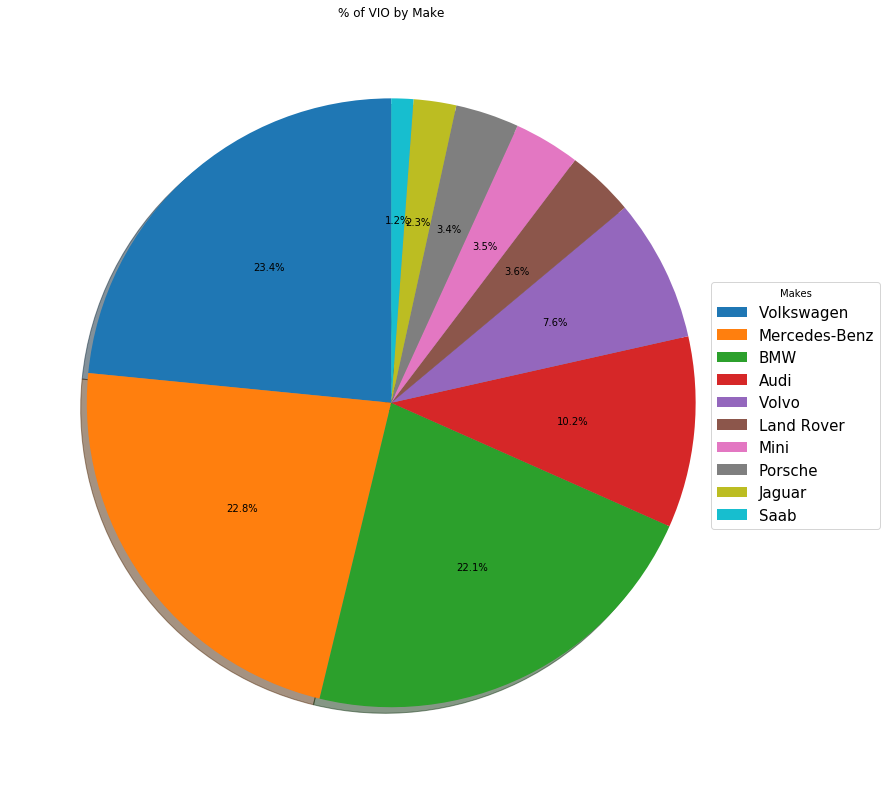

In [19]:
##Find the Percents##

#set figure size
plt.figure(figsize=(14,14))

#set slice sizes
slices = Makes_VIO_Summary.sort_values(by=['Total VIO'], ascending=False)

#assign the pie sizes, explode the urban city type and apply the labels and colors from above
plt.pie(slices['Total VIO'],autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of VIO by Make")
plt.legend(labels=slices.index, bbox_to_anchor=(1.005,.5), fontsize = 15, title= "Makes", loc="center right", bbox_transform=plt.gcf().transFigure)

#save the pie chart
plt.savefig("Images/% of VIO by Make.png")

#show the pie chart
plt.show()

In [20]:
Makes_VIO_Summary

,Total VIO
Make,
Volkswagen,4723686.0
Mercedes-Benz,4589723.0
BMW,4460541.0
Audi,2047227.0
Volvo,1524833.0
Land Rover,726037.0
Mini,707000.0
Porsche,680758.0
Jaguar,456487.0


In [21]:
#output clean VIO data to a CSV file
VIO_Data_Complete.to_csv("Output/VIO_Complete.csv", index=False, header=True)

In [22]:
#print out the first five lines of the ACES data set
ACES_Data.head()

,ShortPartNumber,VehicleID
0,000000000884,15200.0
1,20388002239040,15200.0
2,0375456528,15200.0
3,228613009,15200.0
4,000010128564,15200.0


In [23]:
#check data types in ACES dataset
ACES_Data.dtypes

ShortPartNumber     object
VehicleID          float64
dtype: object

In [24]:
#display counts of rows by column to determine if we need to drop any missing values
ACES_Data.count()

ShortPartNumber    2192930
VehicleID          2191708
dtype: int64

In [25]:
#we found that there were blank rows in the VehicleID column, so we are dropping all blanks
ACES_Data_Clean = ACES_Data.dropna(how="any")

#verify that the counts are now correct
ACES_Data_Clean.count()

ShortPartNumber    2191708
VehicleID          2191708
dtype: int64

In [26]:
#Vehicle ID should be int, not float
ACES_Data_Clean['VehicleID'] = ACES_Data_Clean['VehicleID'].astype(int)
#ACES_Data_Clean_1.dtypes
ACES_Data_Clean.dtypes

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ShortPartNumber    object
VehicleID           int64
dtype: object

In [27]:
#check data types of the ACES data set
ACES_Data.dtypes

ShortPartNumber     object
VehicleID          float64
dtype: object

In [28]:
#print out the first five lines of the Parts data set
Parts_Data.head()

,ShortPartNumber,Main Category,Part Type Name,QTY
0,30758260,Engine,Timing Belt Kit,41
1,TB234K1,Engine,Timing Belt Kit,14
2,159321100,Engine,Timing Belt Kit,10
3,TB131K1,Engine,Timing Belt Kit,433
4,TB032K1,Engine,Timing Belt Kit,47


In [29]:
#display counts of rows by column to determine if we need to drop any missing values
Parts_Data.count()

ShortPartNumber    44620
Main Category      44602
Part Type Name     44608
QTY                44620
dtype: int64

In [30]:
#we found that there were blank rows in several columns, so we are dropping all blanks
Parts_Data_Clean = Parts_Data.dropna(how="any")

#verify that the counts are now correct
Parts_Data_Clean.count()

ShortPartNumber    44602
Main Category      44602
Part Type Name     44602
QTY                44602
dtype: int64

In [31]:
#check data types of the Parts data set
Parts_Data.dtypes

ShortPartNumber    object
Main Category      object
Part Type Name     object
QTY                 int64
dtype: object

In [32]:
merge_on_partNumber = pd.DataFrame.merge(Parts_Data_Clean, ACES_Data_Clean, how='inner', on='ShortPartNumber')
merge_on_partNumber.head()

,ShortPartNumber,Main Category,Part Type Name,QTY,VehicleID
0,30758260,Engine,Timing Belt Kit,41,1510
1,30758260,Engine,Timing Belt Kit,41,1506
2,30758260,Engine,Timing Belt Kit,41,1511
3,30758260,Engine,Timing Belt Kit,41,1513
4,30758260,Engine,Timing Belt Kit,41,1507


In [33]:
#make smaller dataframe from VIO_Data_Complete
VIO_Data_Clean_columns = VIO_Data_Clean[['VehicleID','Make', 'VIO']]

#groupby VehicleID and sum the VIO
VIO_Data_Clean_Sum_VIO = VIO_Data_Clean_columns.groupby(['VehicleID', 'Make'])['VIO'].sum()

#convert to a datafame from a series to be able to merge back to table
Sum_VIO_df = pd.DataFrame(VIO_Data_Clean_Sum_VIO)
Sum_VIO_df.head()
reset_index_df = Sum_VIO_df.reset_index()

#final merge to add VIO sum to merge_on_partNumber dataframe
final_merged_dataframe = pd.DataFrame.merge(merge_on_partNumber, reset_index_df, how='left', on='VehicleID')
final_merged_dataframe.head()

,ShortPartNumber,Main Category,Part Type Name,QTY,VehicleID,Make,VIO
0,30758260,Engine,Timing Belt Kit,41,1510,Volvo,1727.0
1,30758260,Engine,Timing Belt Kit,41,1506,Volvo,1855.0
2,30758260,Engine,Timing Belt Kit,41,1511,Volvo,1136.0
3,30758260,Engine,Timing Belt Kit,41,1513,Volvo,1222.0
4,30758260,Engine,Timing Belt Kit,41,1507,Volvo,2946.0


In [34]:
#print out the first 5 rows of the data set
Population_Data.head()

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [35]:
Population_Data.count()

State              51
2018 Population    51
dtype: int64

In [36]:
State_VIO = VIO_Data_Clean.groupby('State')
State_VIO.head()

,VehicleID,State,Year,Make,VIO,Age
0,545,Wisconsin,1993,Land Rover,2.0,26
1,545,Montana,1993,Land Rover,9.0,26
2,545,New Hampshire,1993,Land Rover,6.0,26
3,545,Wyoming,1993,Land Rover,2.0,26
4,545,Florida,1993,Land Rover,14.0,26
5,545,Idaho,1993,Land Rover,4.0,26
6,545,Washington,1993,Land Rover,17.0,26
7,545,New York,1993,Land Rover,34.0,26
8,545,New Jersey,1993,Land Rover,9.0,26
9,545,Pennsylvania,1993,Land Rover,12.0,26


In [37]:
State_VIO = State_VIO['VIO'].sum()
State_VIO

State
Alabama                  212723.0
Alaska                    28225.0
Arizona                  421964.0
Arkansas                  76232.0
California              3738561.0
Colorado                 411268.0
Connecticut              378089.0
Delaware                  63796.0
District Of Columbia      56949.0
Florida                 1632867.0
Georgia                  651452.0
Hawaii                    84300.0
Idaho                     80122.0
Illinois                 729722.0
Indiana                  232521.0
Iowa                      88902.0
Kansas                   102272.0
Kentucky                 151991.0
Louisiana                154307.0
Maine                     88916.0
Maryland                 435680.0
Massachusetts            576715.0
Michigan                 422170.0
Minnesota                258583.0
Mississippi               92454.0
Missouri                 208053.0
Montana                   48761.0
Nebraska                  58987.0
Nevada                   197377.0
New Hamp

In [38]:
###Data Frame

#put all the variables into a dataframe named school_summary_df
Sate_VIO_Summary = pd.DataFrame({"Total State VIO": State_VIO})

#remove the display of the index name
#print the dataframe, showing all rows
State_VIO_Summary = Sate_VIO_Summary.sort_values('Total State VIO', ascending = False)
Sate_VIO_Summary

,Total State VIO
State,
Alabama,212723.0
Alaska,28225.0
Arizona,421964.0
Arkansas,76232.0
California,3738561.0
Colorado,411268.0
Connecticut,378089.0
Delaware,63796.0
District Of Columbia,56949.0


In [39]:
#final merge to add VIO sum to merge_on_partNumber dataframe
final_merged_VIO = pd.DataFrame.merge(Population_Data, State_VIO_Summary, how='left', on='State')
final_merged_VIO.head()

,State,2018 Population,Total State VIO
0,California,39776830,3738561.0
1,Texas,28704330,1409170.0
2,Florida,21312211,1632867.0
3,New York,19862512,1168534.0
4,Pennsylvania,12823989,864158.0


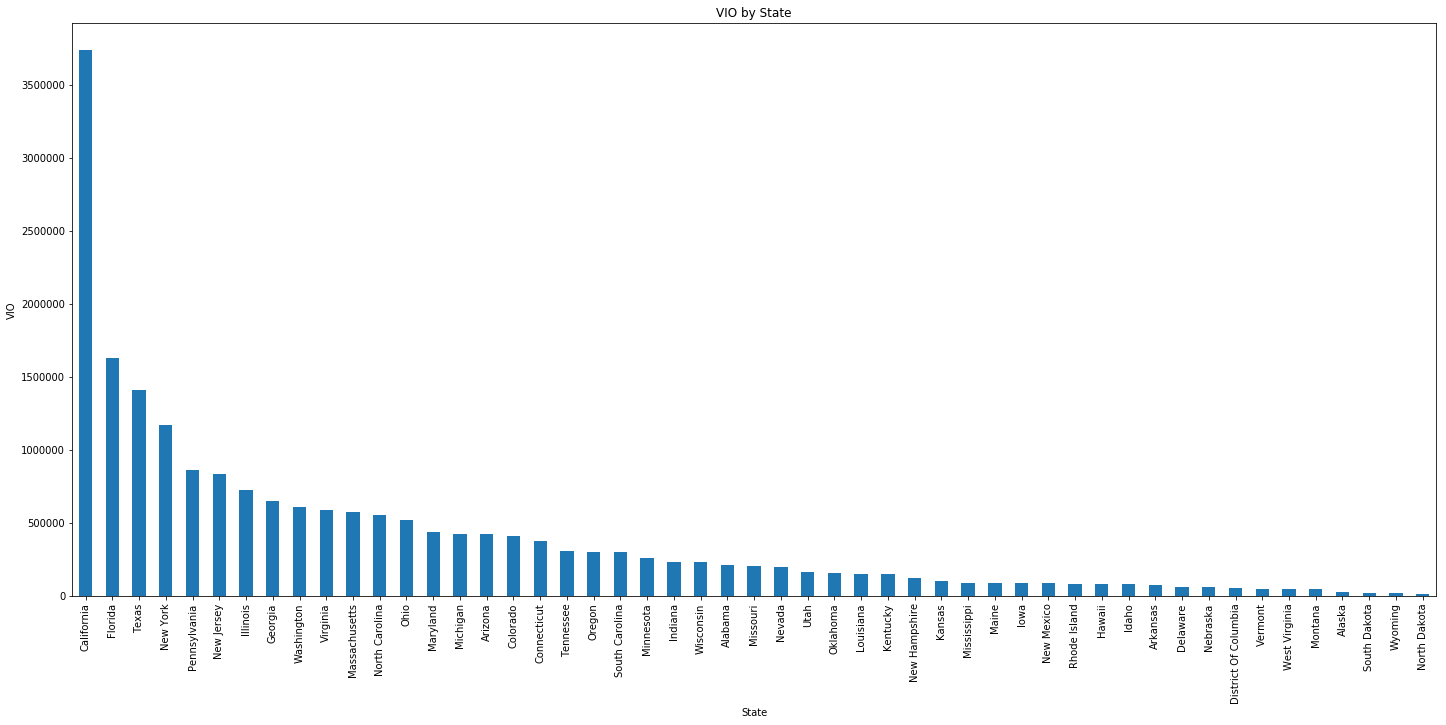

In [40]:
#bar graph  by state quantity
State_VIO_Summary.plot.bar(figsize=(20,10), legend=False)

plt.tight_layout()
plt.title("VIO by State")
plt.ylabel("VIO")
plt.xlabel("State")

#save figure
plt.savefig("Images/VIO_by_State.png")

#show the bar chart
plt.show()

In [41]:
# Q4 - box - Average age of vehicle by state
Average_Age = VIO_Data_Clean.groupby('State')
Average_Age1 = Average_Age['Age'].mean()
Average_Age1

State
Alabama                 14.309627
Alaska                  14.540111
Arizona                 14.272046
Arkansas                13.829585
California              14.334905
Colorado                14.665461
Connecticut             14.155931
Delaware                12.376808
District Of Columbia    13.786868
Florida                 14.249258
Georgia                 14.038815
Hawaii                  13.543533
Idaho                   14.427674
Illinois                13.787023
Indiana                 13.543454
Iowa                    14.045857
Kansas                  13.784864
Kentucky                13.783419
Louisiana               12.929359
Maine                   14.698215
Maryland                14.254935
Massachusetts           13.726971
Michigan                13.884131
Minnesota               14.186441
Mississippi             14.429251
Missouri                14.131593
Montana                 15.246004
Nebraska                14.112869
Nevada                  13.434237
New Hamp

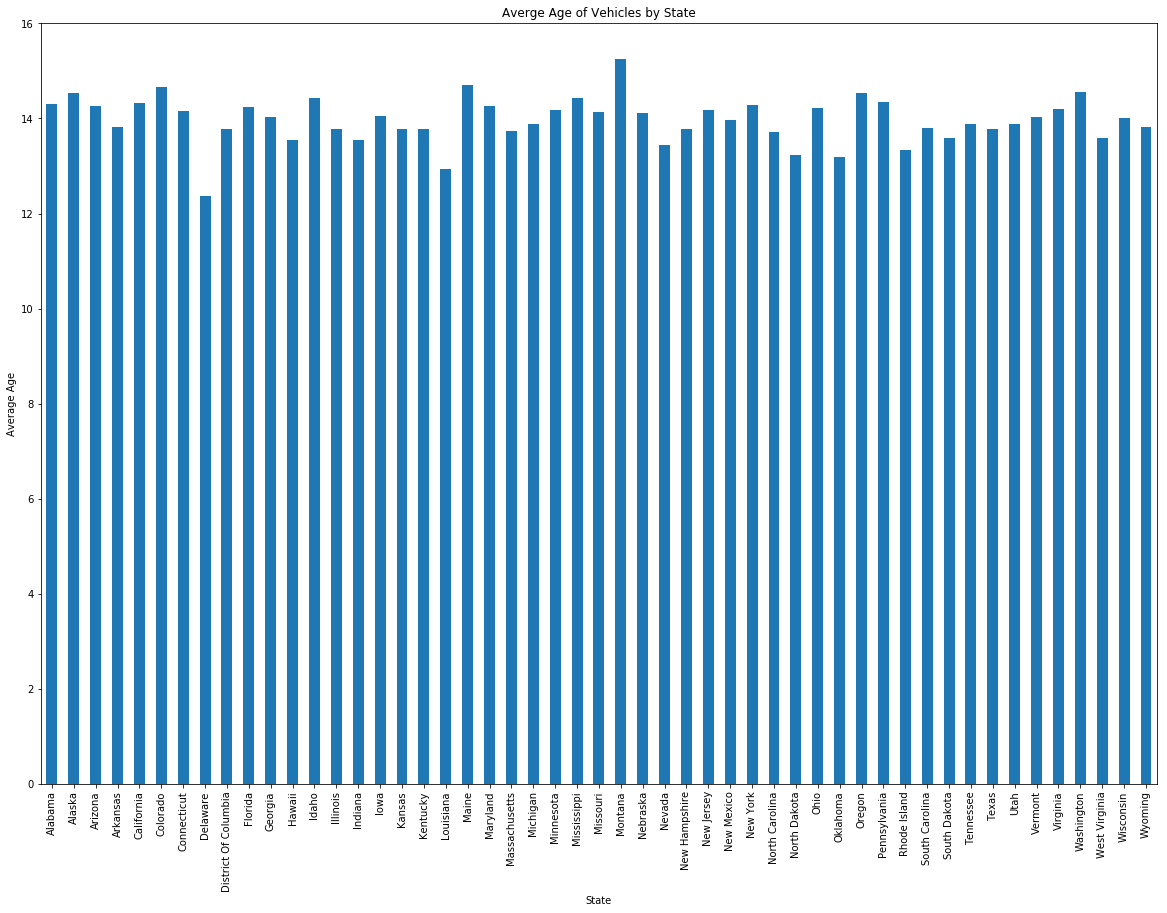

In [42]:
Average_Age1.plot.bar(figsize=(20,14), legend=False)

plt.title("Averge Age of Vehicles by State")
plt.ylabel("Average Age")
plt.xlabel("State")

#save figure
plt.savefig("Images/Average_Age_of_Cars_by_State.png")

#show the bar chart
plt.show()

In [43]:
Average_Age_by_Type = VIO_Data_Clean.groupby('Make')
Average_Age2 = Average_Age_by_Type['Age'].mean()
Average_Age2

Make
Audi              9.916117
BMW              11.315923
Jaguar           14.845397
Land Rover        9.356594
Mercedes-Benz    15.631978
Mini              5.622101
Porsche          14.796116
Saab             21.877011
Volkswagen       17.122899
Volvo            15.943907
Name: Age, dtype: float64

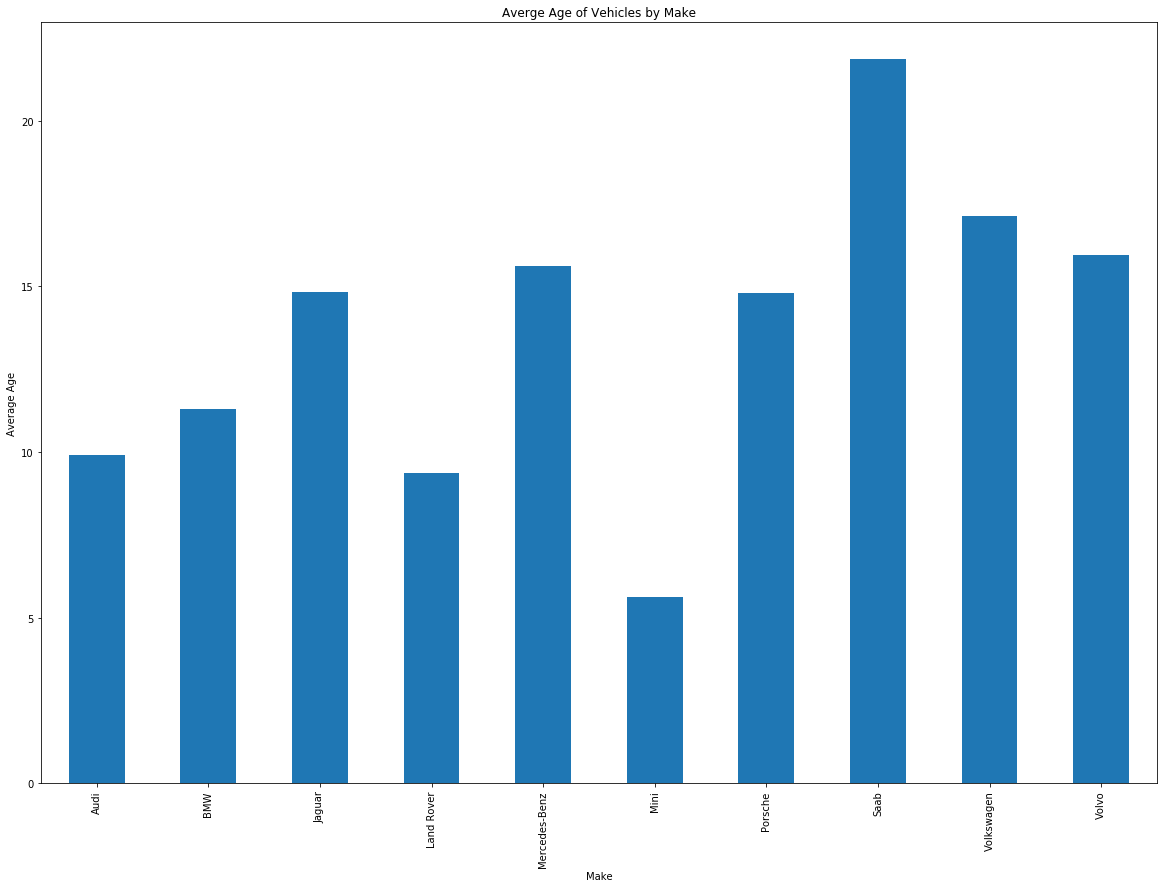

In [44]:
Average_Age2.plot.bar(figsize=(20,14), legend=False)

plt.title("Averge Age of Vehicles by Make")
plt.ylabel("Average Age")
plt.xlabel("Make")

#save figure
plt.savefig("Images/Average_Age_of_Cars_by_Make.png")

#show the bar chart
plt.show()

In [45]:
# Google API Key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [46]:
# pull in data from Kaggle
Lat_Lng = pd.read_csv("Resources/statelatlong.csv")
Lat_Lng

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518784,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


In [47]:
#make copy of df
Capital_State_VIO = State_VIO_Summary.copy()
Capital_State_VIO

,Total State VIO
State,
California,3738561.0
Florida,1632867.0
Texas,1409170.0
New York,1168534.0
Pennsylvania,864158.0
New Jersey,837380.0
Illinois,729722.0
Georgia,651452.0
Washington,608369.0


In [48]:
#Capital_State_VIO = Capital_State_VIO.reset_index()

#merge lat/lng onto state VIO
Capital_State_VIO_merged_dataframe = pd.DataFrame.merge(Lat_Lng, Capital_State_VIO, how='left', left_on = 'City', right_on = 'State')
Capital_State_VIO_merged_dataframe

,State,Latitude,Longitude,City,Total State VIO
0,AL,32.601011,-86.680736,Alabama,212723.0
1,AK,61.302501,-158.775020,Alaska,28225.0
2,AZ,34.168219,-111.930907,Arizona,421964.0
3,AR,34.751928,-92.131378,Arkansas,76232.0
4,CA,37.271875,-119.270415,California,3738561.0
5,CO,38.997934,-105.550567,Colorado,411268.0
6,CT,41.518784,-72.757507,Connecticut,378089.0
7,DE,39.145251,-75.418921,Delaware,63796.0
8,DC,38.899349,-77.014567,District of Columbia,NaN
9,FL,27.975728,-83.833017,Florida,1632867.0


In [49]:
# Store latitude and longitude in locations
locations = Capital_State_VIO_merged_dataframe[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = Capital_State_VIO_merged_dataframe["Total State VIO"].astype(float)

In [50]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
# Plost as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1000000,
                                 point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [52]:
#Need to drop NaN value in order to use linregress to find slope for number of cars per individual

print(len(final_merged_VIO))
final_merged_VIO = final_merged_VIO.dropna(how='any')
print(len(final_merged_VIO))

51
50


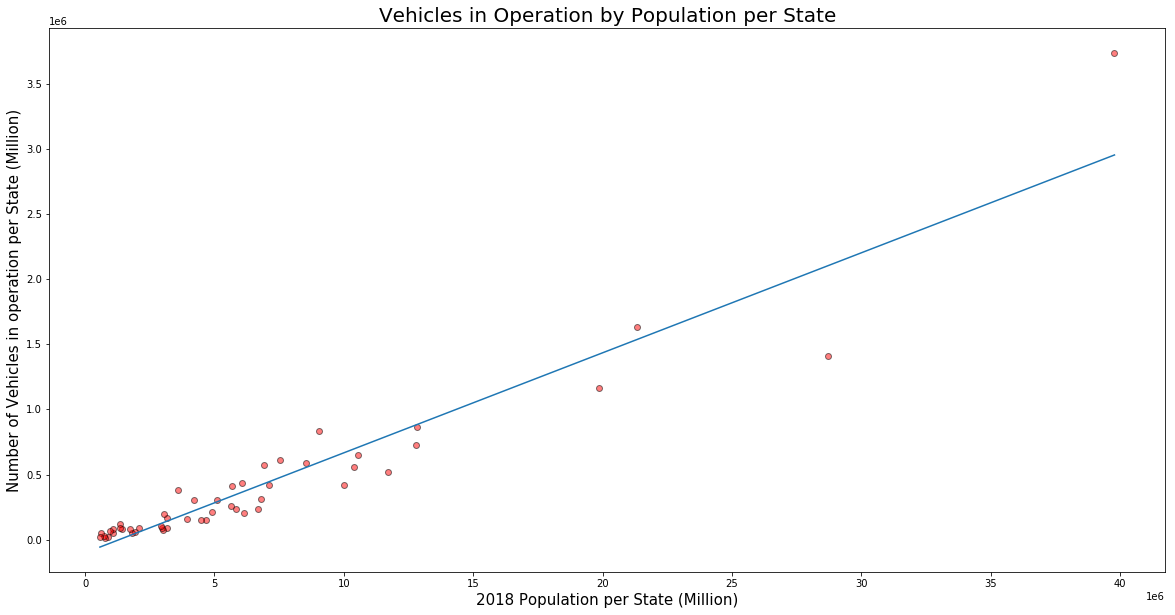

The average number of cars per person in the US is 0.07682373709274494


In [53]:
# plot population vs VIO, fit a line and determine how many cars per person avg
from scipy.stats import linregress

plt.figure(figsize = (20,10))
plt.scatter(final_merged_VIO['2018 Population'], final_merged_VIO['Total State VIO'], marker = "o",
           facecolors = "red", edgecolor= "black", alpha= 0.5)
plt.title("Vehicles in Operation by Population per State", fontsize = 20)
plt.xlabel("2018 Population per State (Million)", fontsize = 15)
plt.ylabel("Number of Vehicles in operation per State (Million)", fontsize = 15)
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='y')
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='x')

x_axis_series = final_merged_VIO['2018 Population']
y_axis_series = final_merged_VIO['Total State VIO']

#find slope for # of cars per person on average in the US
slope, intercept, *_ = linregress(x_axis_series, y_axis_series)
fit = slope * x_axis_series  + intercept
plt.plot(x_axis_series, fit)

#save figure
plt.savefig("Images/VIO_by_Population_per_State.png")

plt.show()
print(f'The average number of cars per person in the US is {slope}')

In [54]:
#Making one more table for graphing sales QTY vs VIO per part category
final_merged_dataframe_col_clean = final_merged_dataframe[['Main Category', 'QTY', 'VIO']]
final_merged_dataframe_col_clean.head()
Sales_vs_VIO = final_merged_dataframe.groupby(['Main Category'])['QTY','VIO'].sum()
Sales_vs_VIO

,QTY,VIO
Main Category,,
Accessories and Fluids,480406077,7.849633e+08
Air and Fuel Delivery,42613441,3.818048e+08
Body,139182318,1.114200e+09
"Body Electrical, Lighting, Relays, and Switches",78615856,6.293807e+08
Brake,50621522,4.120895e+08
"Charging, Engine Electrical, and Starting",8112061,1.473907e+08
Cooling and Drive Belts,79547312,6.135790e+08
"Differential, Driveline, and Axles",22799301,2.343265e+08
Emission Control,25037389,2.870108e+08


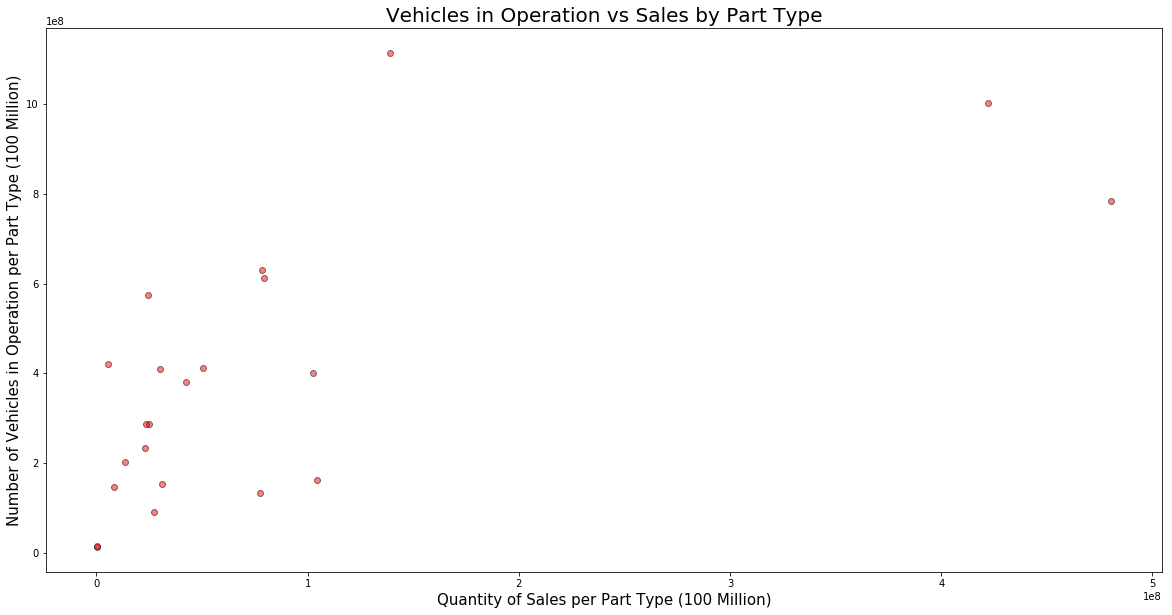

In [55]:
#graph sales QTY vs VIO

plt.figure(figsize = (20,10))
plt.scatter(Sales_vs_VIO['QTY'], Sales_vs_VIO['VIO'], marker = "o",
           facecolors = "red", edgecolor= "black", alpha= 0.5)

plt.title("Vehicles in Operation vs Sales by Part Type", fontsize = 20)
plt.xlabel("Quantity of Sales per Part Type (100 Million)", fontsize = 15)
plt.ylabel("Number of Vehicles in Operation per Part Type (100 Million)", fontsize = 15)
plt.ticklabel_format(style='sci',scilimits=(8,8),axis='y')
plt.ticklabel_format(style='sci',scilimits=(8,8),axis='x')

#save figure
plt.savefig("Images/Sales_by_Part_Type_vs_VIO.png")

#show the plot
plt.show()

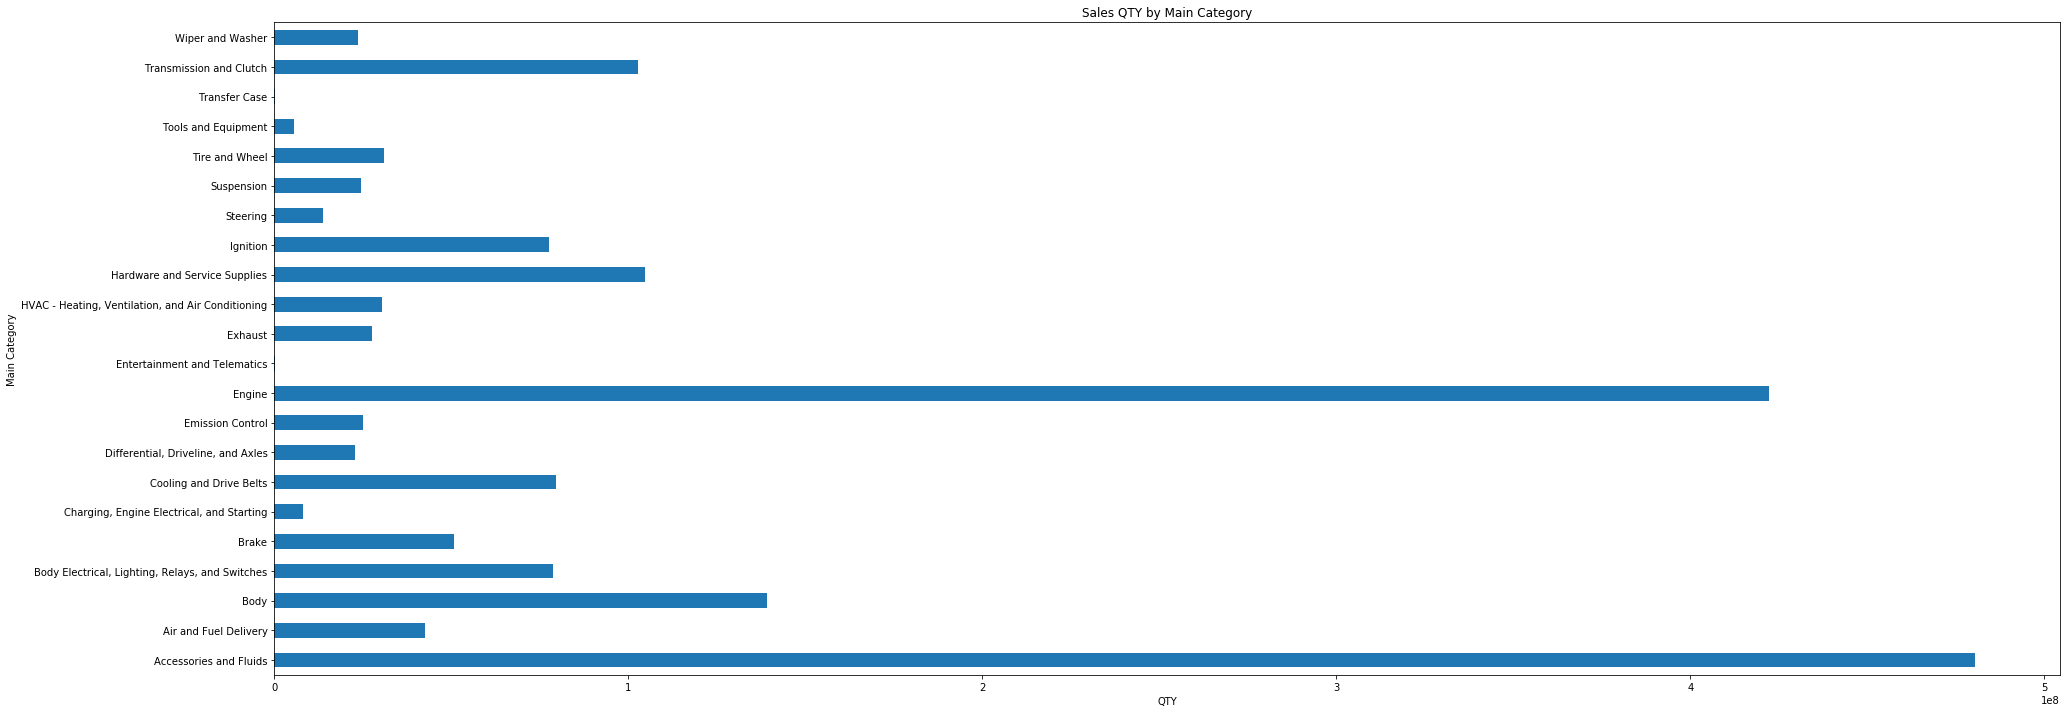

In [56]:
Sales_vs_VIO['QTY'].plot.barh(figsize=(32,12))

plt.title("Sales QTY by Main Category")
plt.ylabel("Main Category")
plt.xlabel("QTY")

#save figure
plt.savefig("Images/Sales_by_Category.png")

#show the bar chart
plt.show()

In [57]:
Qty_Make_Merge = pd.DataFrame.merge(Make_Vehicle_VIO_Summary, final_merged_dataframe, how='left', on='VehicleID')
print(len(Qty_Make_Merge))
Qty_Make_Merge = Qty_Make_Merge.dropna(how='any')
print(len(Qty_Make_Merge))

1967438
1966882


In [58]:
Qty_Make_Merge = Qty_Make_Merge[['Make', 'QTY']]
Qty_Make_Merge.head()
Qty_Make_Groupby = Qty_Make_Merge.groupby(['Make'])['QTY'].sum()
Qty_Make_Groupby_df = pd.DataFrame(Qty_Make_Groupby)
Qty_Make_Groupby_df

,QTY
Make,
Audi,115550872.0
BMW,536100277.0
Jaguar,2830070.0
Land Rover,7159924.0
Mercedes-Benz,594448888.0
Mini,35798204.0
Porsche,117035583.0
Saab,10732902.0
Volkswagen,133808202.0


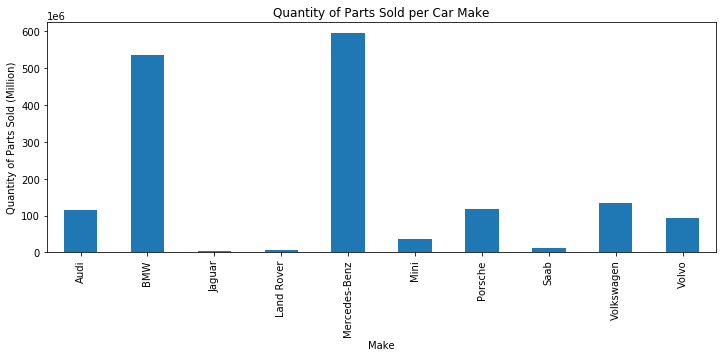

In [59]:
Qty_Make_Groupby_df.plot.bar(figsize=(10,5), legend=False)
plt.ticklabel_format(style='sci',scilimits=(6,6),axis='y')
plt.tight_layout()
plt.title("Quantity of Parts Sold per Car Make")
plt.ylabel("Quantity of Parts Sold (Million)")
plt.xlabel("Make")

#save figure
plt.savefig("Images/QTY_Parts_Sold_By_Make.png")

#Show the plot
plt.show()